# Transfer Learning

There are various methods for transfer learning such as **fine tuning** and **frozen feature extraction**. In this tutorial, we will demonstrate how to perform a **frozen feature extraction** type of transfer learning in XenonPy.

This tutorial will use **Refractive Index** data, which are collected from [Polymer Genome](https://www.polymergenome.org). We do not provide these data directly in this tutorial. If you want to rerun this notebook locally, you must collect these data yourself.

### frozen feature extraction

A frozen feature extraction type of transfer learning can be split into 2 steps:

1. you need to have pre-trained model(s) as source model(s). This can be done by accessing **XenonPy.MDL**.
2. you need a feature extractor to generate "neural descriptors" from the source model(s).
Here, we would like to introduce you to our feature extractor, ``xenonpy.descriptor.FrozenFeaturizer``.

The following codes show a case study of transfer learning between **Refractive Index** of inorganic and organic materials. In this example, the source models will be trained on inorganic compounds and the target will be polymers.

Let's do this transfer learning step-by-step.

### useful functions

Running the following cell will load some commonly used packages, such as [NumPy](https://numpy.org/), [pandas](https://pandas.pydata.org/), and so on. It will also import some in-house functions used in this tutorial. See *'tools.ipynb'* file to check what will be imported.

In [1]:
%run tools.ipynb

### access pre-trained models with MDL class

We prepared a wide range of APIs to let you query and download our models.
These APIs can be accessed via any HTTP requests.
For convenience, we implemented some of the most popular APIs and wrapped them into XenonPy.
All these functions can be accessed using `xenonpy.mdl.MDL`.

In [3]:
from xenonpy.mdl import MDL

mdl = MDL()
mdl

mdl.version

MDL(api_key='anonymous.user.key', endpoint='http://xenon.ism.ac.jp/api')

'0.1.1'

#### 1. query **Refractive Index** models 

In [29]:
query = mdl(modelset_has="Stable", property_has="refractive")
query

QueryModelDetailsWith(api_key='anonymous.user.key', endpoint='http://xenon.ism.ac.jp/api', variables={'modelset_has': 'Stable', 'property_has': 'refractive'})
Queryable: 
 id
 transferred
 succeed
 isRegression
 deprecated
 modelset
 method
 property
 descriptor
 lang
 accuracy
 precision
 recall
 f1
 sensitivity
 prevalence
 specificity
 ppv
 npv
 meanAbsError
 maxAbsError
 meanSquareError
 rootMeanSquareError
 r2
 pValue
 spearmanCorr
 pearsonCorr

In [30]:
summary = query('id', 'modelset', 'meanAbsError', 'pearsonCorr').sort_values('meanAbsError')
summary.head(3)

,id,modelset,meanAbsError,pearsonCorr
311,2949,Stable inorganic compounds in materials project,0.282434,0.873065
847,4017,Stable inorganic compounds in materials project,0.290382,0.827995
1189,4702,Stable inorganic compounds in materials project,0.293135,0.876289


#### 2. download the best performing model based on MAE

In [31]:
results = mdl.pull(summary.id[0].item())
results

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


,id,model
0,2335,/Users/liuchang/Google 云端硬盘/postdoctoral/tutor...


#### 3. load **Refractive Index** data from Polymer Genome and calculate the ``Composition`` descriptors

In [32]:
pg = <load your polymer genome data>
pg.head(3)

,Smiles,Natoms,Ntypes,Volume of Cell($\AA^3$),"Band Gap, PBE(eV)","Band Gap, HSE06(eV)",Dielectric Constant,"Dielectric Constant, Electronic","Dielectric Constant, Ionic",Atomization Energy(eV/atom),Density(g/cm$^3$),Refractive Index,Ionization Energy(eV),Electron Affinity(eV),Cohesive Energy(eV/atom),composition,Formula
ID_name,,,,,,,,,,,,,,,,,
MOL1,[C@H]([CH]O)(O[C@H]1[C@H](CO)O[C@@H]([CH][C@@H...,84,3,572.42,5.62,7.48,3.78,2.85,0.93,-5.48,1.88,1.69,6.87,0.83,-0.63,"{'O': 20.0, 'H': 40.0, 'C': 24.0}",H40C24O20
MOL2,[CH][C@H](C[C@@H](C[C@H](C[CH][C]=[CH])C(=[CH]...,128,2,1258.30,3.94,4.83,2.72,2.64,0.08,-5.90,1.10,1.62,3.56,1.56,-0.63,"{'C': 64.0, 'H': 64.0}",H64C64
MOL3,C[C@H](C[CH][CH][CH]C)[CH2].C[C@@H](C[CH][CH][...,108,2,762.10,6.32,7.70,2.61,2.59,0.02,-5.14,1.10,1.61,6.19,0.43,-0.51,"{'C': 36.0, 'H': 72.0}",H72C36


In [33]:
from xenonpy.descriptor import Compositions

pg_desc = Compositions().transform(pg['composition'])
pg_desc.head(3)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
ID_name,,,,,,,,,,,,,,,,,,,,,
MOL1,4.095238,98.42891,168.333333,11.561905,7.721000,1488.27381,54.596505,20.761905,51.333333,51.666667,...,1.0,1.0,0.711,0.02658,110.0,120.0,162.0,288.6,317.5,0.666793
MOL2,3.500000,85.00000,172.000000,9.700000,6.509500,2560.14000,44.899820,27.205000,52.000000,53.500000,...,1.0,1.0,0.711,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793
MOL3,2.666667,83.00000,166.000000,11.166667,4.675667,1713.52000,48.866426,20.306667,45.000000,46.333333,...,1.0,1.0,0.711,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793


#### 4. predict Polymer Genome **Refractive Index** directly from a model trained on inorganic compounds

In [34]:
from xenonpy.model.training import Checker

checker = Checker(results.model[0])
checker.checkpoints

<Checker> includes:
"mse_3": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.refractive_index/xenonpy.compositions/pytorch.nn.neural_network/290-187-151-110-102-1-$wHSyTrhF/checkpoints/mse_3.pth.s
"mse_1": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.refractive_index/xenonpy.compositions/pytorch.nn.neural_network/290-187-151-110-102-1-$wHSyTrhF/checkpoints/mse_1.pth.s
"mae_2": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.refractive_index/xenonpy.compositions/pytorch.nn.neural_network/290-187-151-110-102-1-$wHSyTrhF/checkpoints/mae_2.pth.s
"r2_5": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_20190925 2/inorganic.crystal.refractive_index/xenonpy.compositions/pytorch.nn.neural_network/290-187-151-110-102-1-$wHSyTrhF/checkpoints/r2_5.pth.s
"mse_5": /Users/liuchang/Google 云端硬盘/postdoctoral/tutorial/xenonpy_hands-on_201909

In [35]:
# --- pre-trained model for prediction
from xenonpy.model.training import Trainer

trainer = Trainer.load(from_=checker)
trainer

Trainer(clip_grad=None, cuda=None, epochs=200, loss_func=None,
        lr_scheduler=None,
        model=SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=187, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(187, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(...
    (normalizer): BatchNorm1d(110, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=110, out_features=102, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(102, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=102, out_features=1, bias=True)
),
        non_blocking=False, optimizer=None)

Missing directory and/or file name information!


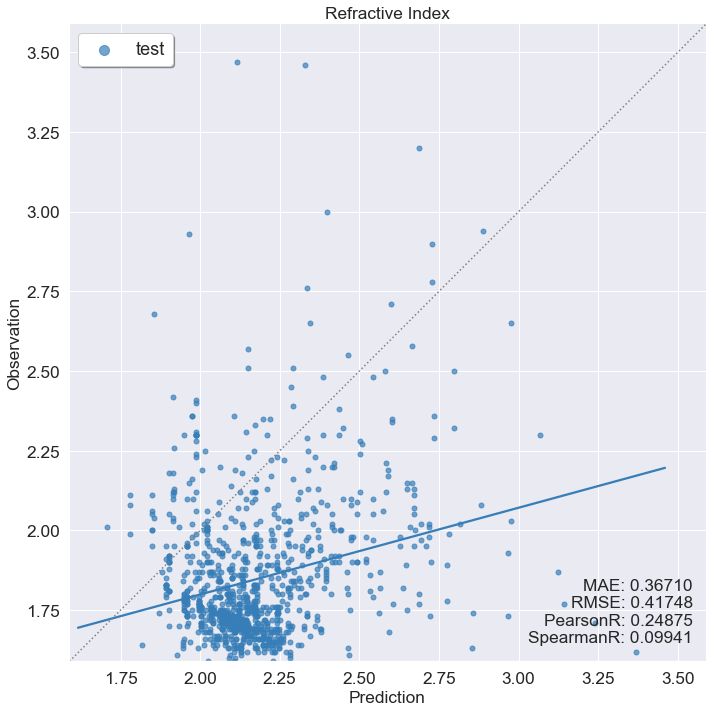

In [36]:
trainer.reset(to='mae_1')

y_pred = trainer.predict(x_in=torch.tensor(pg_desc.values, dtype=torch.float)).detach().numpy().flatten()
y_true = pg['Refractive Index'].values

draw(y_true, y_pred, prop_name='Refractive Index')

#### 5. frozen feature extraction

``FrozenFeaturizer`` accepts a [Pytorch](https://pytorch.org) model as its input.

In [37]:
from xenonpy.descriptor import FrozenFeaturizer

# --- init FrozenFeaturizer with NN model
ff = FrozenFeaturizer(model=trainer.model)
ff

FrozenFeaturizer(cuda=False, depth=None,
                 model=SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=187, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(187, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=187, out_features=151, bias=...
    (normalizer): BatchNorm1d(110, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=110, out_features=102, bias=True)
    (dropout): Dropout(p=0.1)
    (normalizer): BatchNorm1d(102, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=102, out_features=1, bias=True)
),
                 on_errors='raise', return_type='any')

The following code will generate new "neural descriptors" from the corresponding neural network model.

In [38]:
neural_descriptors = ff.transform(pg_desc, depth=2 ,return_type='df')

Here, ``depth=x`` means that the last x hidden layer from the output neuron(s) will be concatenated and used as the neural descriptor.

In [39]:
neural_descriptors.head(3)

,L(-2)_1,L(-2)_2,L(-2)_3,L(-2)_4,L(-2)_5,L(-2)_6,L(-2)_7,L(-2)_8,L(-2)_9,L(-2)_10,...,L(-1)_93,L(-1)_94,L(-1)_95,L(-1)_96,L(-1)_97,L(-1)_98,L(-1)_99,L(-1)_100,L(-1)_101,L(-1)_102
ID_name,,,,,,,,,,,,,,,,,,,,,
MOL1,-1.499497,1.254353,-1.071701,-2.697761,-1.807236,-2.01011,-1.944547,-1.533609,-1.380140,-0.416400,...,-0.146019,-0.599903,-0.168826,0.135178,0.607779,0.700811,-1.405137,-0.209901,-0.297132,0.071797
MOL2,-1.295168,1.335794,-1.657156,-3.456876,-1.372355,-2.39925,-1.761726,-1.736894,-1.464569,-1.349594,...,0.026329,-0.161609,-0.542276,0.246088,1.047052,0.067110,-1.963629,-0.109732,-0.328646,0.103320
MOL3,-1.514608,1.205772,-1.270560,-2.831598,-1.677628,-2.02982,-1.933016,-1.568646,-1.363735,-0.656209,...,-0.118927,-0.526747,-0.172702,0.154083,0.656889,0.607651,-1.418730,-0.193771,-0.278343,0.091769


As an example, **-1** in the column names denotes the last layer.

DescriptorHeatmap(bc=True, col_cluster=True, col_colors=None, col_linkage=None,
                  figsize=(70, 10), mask=None, method='average',
                  metric='euclidean', pivot_kws=None, row_cluster=False,
                  row_colors=None, row_linkage=None, save=None)

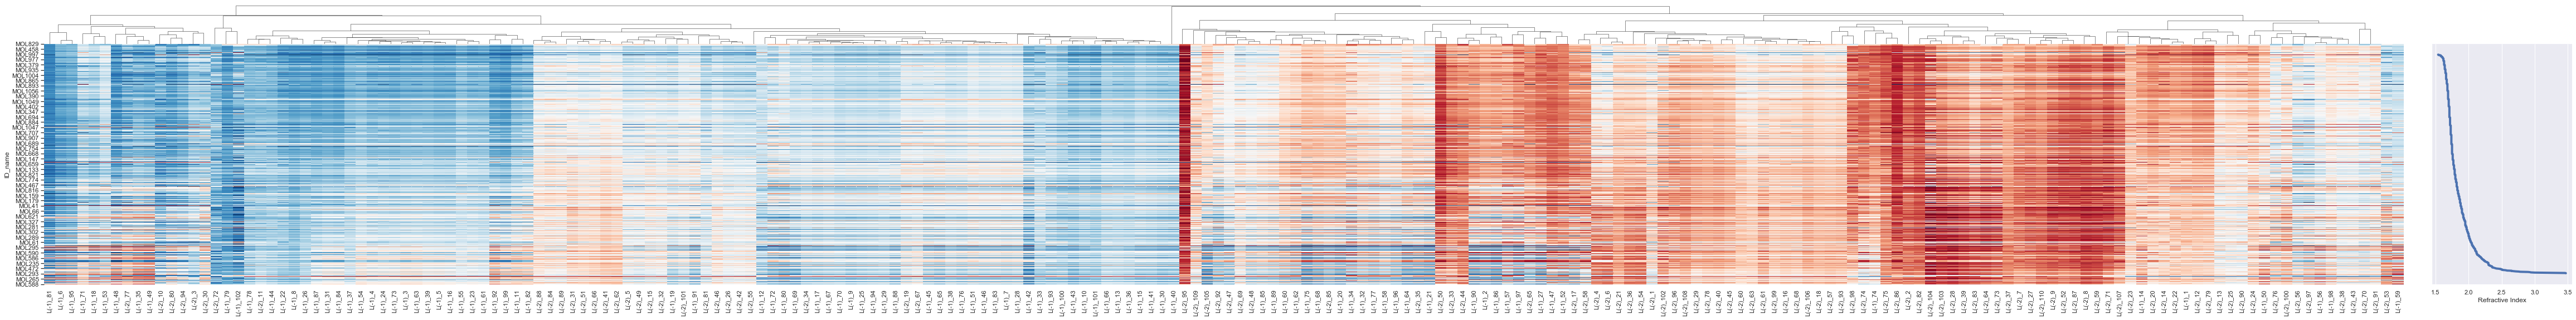

In [41]:
from xenonpy.visualization import DescriptorHeatmap

sorted_prop = pg['Refractive Index'].sort_values()
sorted_desc = neural_descriptors.loc[sorted_prop.index]

heatmap = DescriptorHeatmap( 
        bc=True,  # use box-cox transform 
#         save=dict(fname='heatmap_density', dpi=150, bbox_inches='tight'),  # save figure to file
        figsize=(70, 10))
heatmap.fit(sorted_desc)
heatmap.draw(sorted_prop)

#### 6. use neural descriptors to train new models.

In this case, **Random Forest** model and **Bayesian Ridge Linear** model will be trained.

In [42]:
# split data
from xenonpy.datatools import Splitter

y = pg['Refractive Index']
splitter = Splitter(len(y), test_size=0.2)

X_train, X_test, y_train, y_test = splitter.split(neural_descriptors, y.values.reshape(-1, 1))

In [43]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)
y_fit_pred = rf.predict(X_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Missing directory and/or file name information!


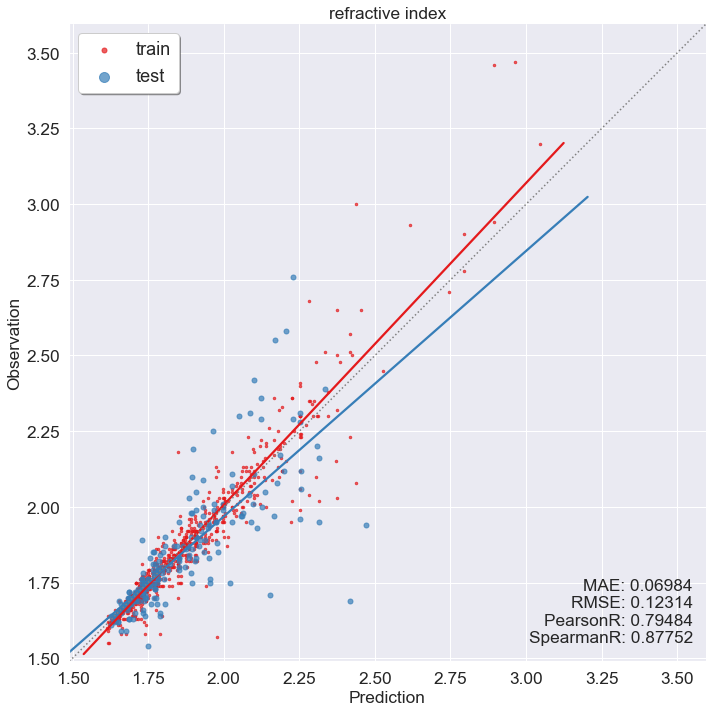

In [44]:
draw(y_test.ravel(), y_pred, y_train.ravel(), y_fit_pred, prop_name='refractive index')

In [45]:
# bayesian linear
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train.ravel())
y_pred = br.predict(X_test)
y_fit_pred = br.predict(X_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

Missing directory and/or file name information!


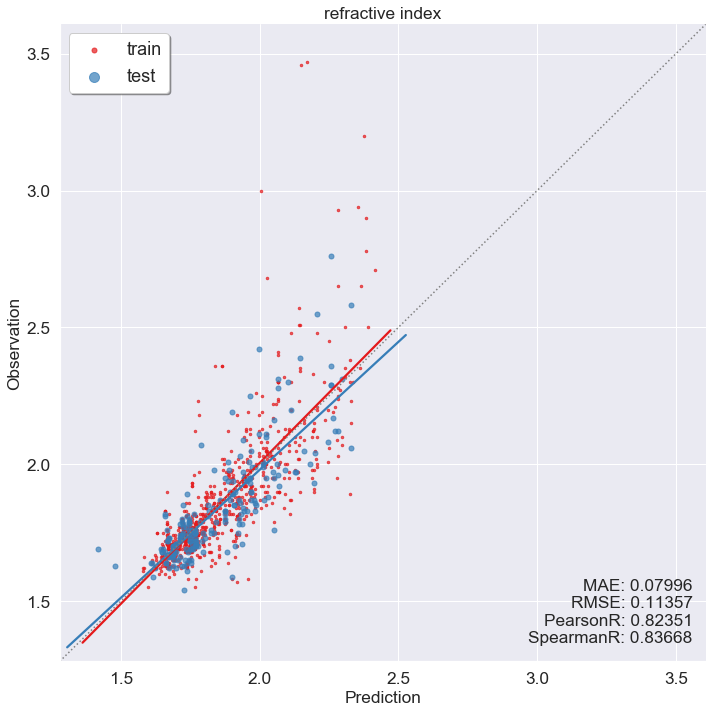

In [46]:
draw(y_test.ravel(), y_pred, y_train.ravel(), y_fit_pred, prop_name='refractive index')